# Task 2: MNIST Handwritten Digits Classification using CNN

## Objective
Build a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset and achieve >95% test accuracy.

## Goals
1. Load and preprocess MNIST dataset
2. Build a CNN model architecture
3. Train the model with proper validation
4. Achieve >95% test accuracy
5. Visualize model predictions on sample images
6. Analyze model performance and architecture


## Step 1: Import Required Libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.20.0
Keras version: 3.11.3


## Step 2: Load and Explore MNIST Dataset


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 21s 2us/step
Dataset shapes:
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)

Data types:
Images dtype: uint8
Labels dtype: uint8

Value ranges:
Image pixel range: 0 to 255
Label range: 0 to 9

Unique classes: [0 1 2 3 4 5 6 7 8 9]


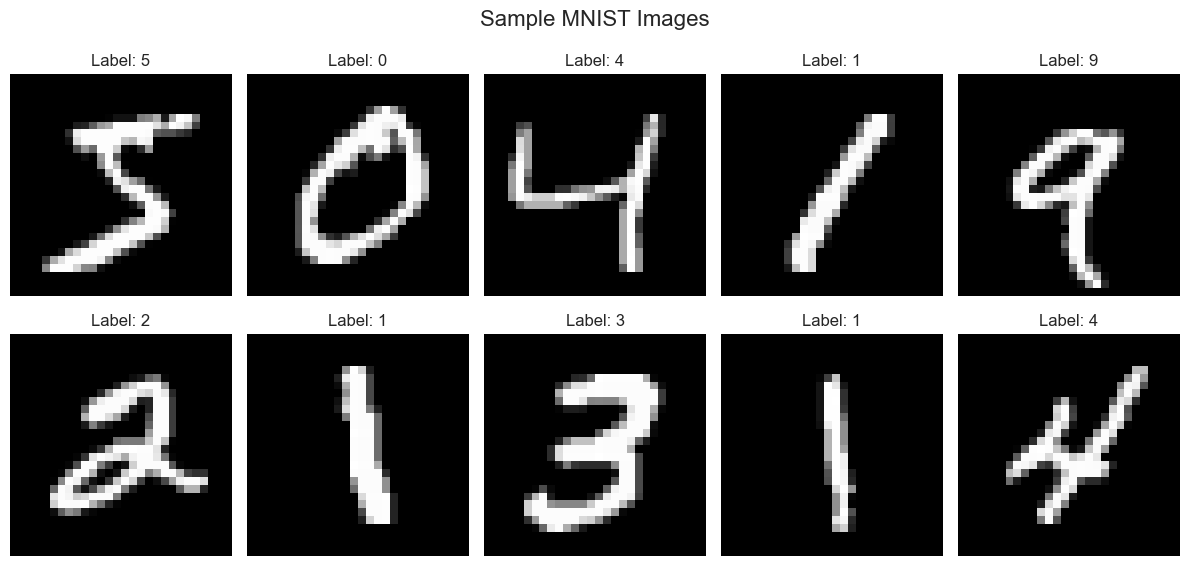

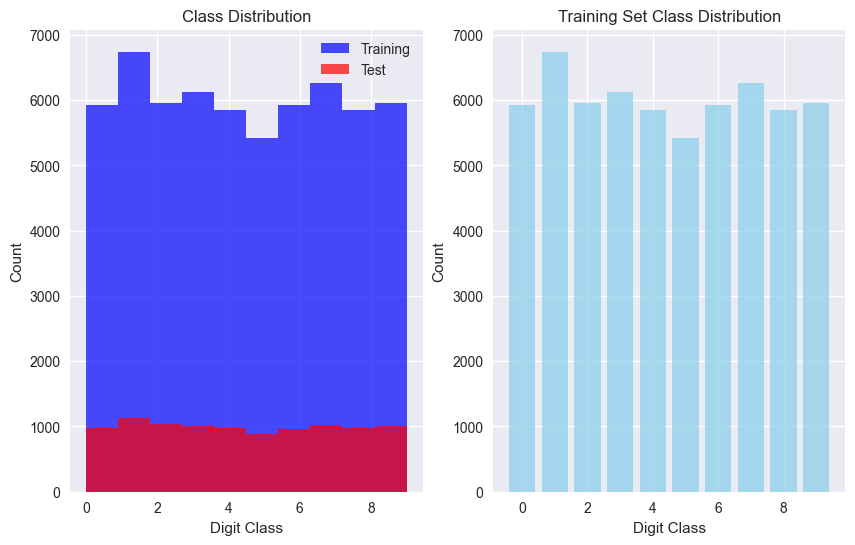

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Dataset shapes:")
print(f"Training images: {x_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test images: {x_test.shape}")
print(f"Test labels: {y_test.shape}")

print(f"\nData types:")
print(f"Images dtype: {x_train.dtype}")
print(f"Labels dtype: {y_train.dtype}")

print(f"\nValue ranges:")
print(f"Image pixel range: {x_train.min()} to {x_train.max()}")
print(f"Label range: {y_train.min()} to {y_train.max()}")

print(f"\nUnique classes: {np.unique(y_train)}")

# Visualize some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i], cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}')
    axes[row, col].axis('off')
plt.suptitle('Sample MNIST Images', fontsize=16)
plt.tight_layout()
plt.show()

# Class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=10, alpha=0.7, label='Training', color='blue')
plt.hist(y_test, bins=10, alpha=0.7, label='Test', color='red')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.legend()

plt.subplot(1, 2, 2)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, alpha=0.7, color='skyblue')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')
plt.show()


## Step 3: Data Preprocessing


In [ ]:
# Normalize pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to include channel dimension (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print("After preprocessing:")
print(f"Training images shape: {x_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Training labels shape: {y_train_cat.shape}")
print(f"Test labels shape: {y_test_cat.shape}")

print(f"\nNormalized pixel range: {x_train.min():.3f} to {x_train.max():.3f}")

# Verify one-hot encoding
print(f"\nSample one-hot encoded labels:")
print(f"Original: {y_train[:5]}")
print(f"One-hot: {y_train_cat[:5]}")

# Create validation split from training data
x_val = x_train[:10000]
y_val = y_train_cat[:10000]
x_train = x_train[10000:]
y_train_cat = y_train_cat[10000:]

print(f"\nAfter validation split:")
print(f"Training: {x_train.shape[0]} samples")
print(f"Validation: {x_val.shape[0]} samples")
print(f"Test: {x_test.shape[0]} samples")


After preprocessing:
Training images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)

Normalized pixel range: 0.000 to 1.000

Sample one-hot encoded labels:
Original: [5 0 4 1 9]
One-hot: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

After validation split:
Training: 50000 samples
Validation: 10000 samples
Test: 10000 samples


## Step 4: Build CNN Model Architecture


In [ ]:
# Build CNN model
model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    # Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Calculate total parameters
total_params = model.count_params()
print(f"\nTotal parameters: {total_params:,}")

# Visualize model architecture
keras.utils.plot_model(model, to_file='mnist_cnn_architecture.png', 
                      show_shapes=True, show_layer_names=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,346 (2.05 MB)

 Trainable params: 536,874 (2.05 MB)

 Non-trainable params: 1,472 (5.75 KB)


Total parameters: 538,346
You must install pydot (`pip install pydot`) for `plot_model` to work.


## Step 5: Train the Model


In [ ]:
# Define callbacks for better training
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

# Train the model
print("Starting training...")
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=7,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")


Starting training...


Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 249s 635ms/step - accuracy: 0.9827 - loss: 0.0587 - val_accuracy: 0.9892 - val_loss: 0.0442 - learning_rate: 0.0010
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 213s 545ms/step - accuracy: 0.9838 - loss: 0.0542 - val_accuracy: 0.9890 - val_loss: 0.0427 - learning_rate: 0.0010
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 244s 499ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9891 - val_loss: 0.0447 - learning_rate: 0.0010
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 190s 486ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 0.9887 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 185s 473ms/step - accuracy: 0.9870 - loss: 0.0439 - val_accuracy: 0.9890 - val_loss: 0.0384 - learning_rate: 0.0010
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 198s 507ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.9904 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 191s 487ms/step - accuracy: 0.9

## Step 6: Evaluate Model Performance


=== MODEL EVALUATION ===
Test Loss: 0.0267
Test Accuracy: 0.9930 (99.30%)
✅ SUCCESS: Achieved target accuracy of 95.0%!
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



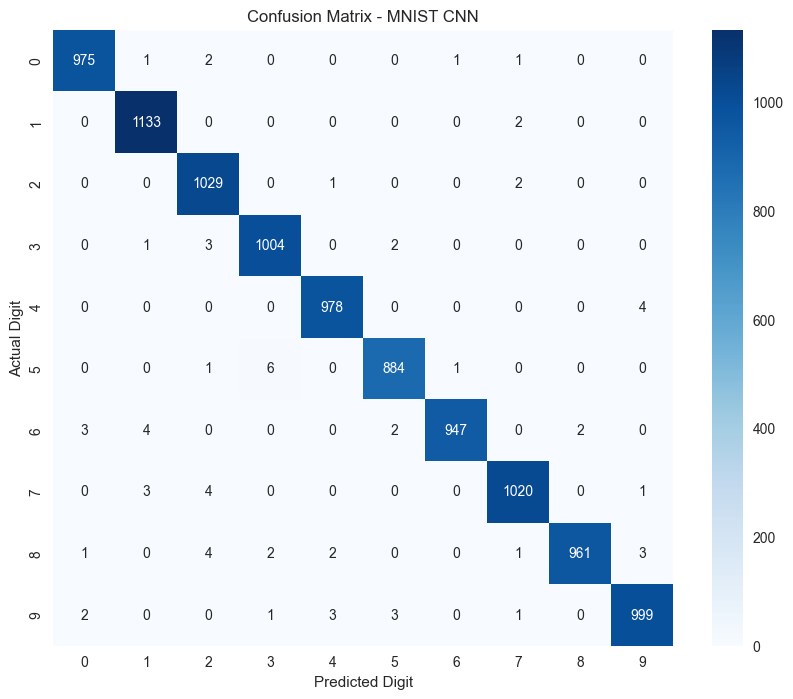

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

print("=== MODEL EVALUATION ===")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Check if we achieved the target accuracy
target_accuracy = 0.95
if test_accuracy >= target_accuracy:
    print(f"✅ SUCCESS: Achieved target accuracy of {target_accuracy*100:.1f}%!")
else:
    print(f"❌ Target not met: Need {target_accuracy*100:.1f}%, got {test_accuracy*100:.2f}%")

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_classes, 
                          target_names=[str(i) for i in range(10)]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - MNIST CNN')
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.show()


## Step 7: Visualize Training History and Predictions


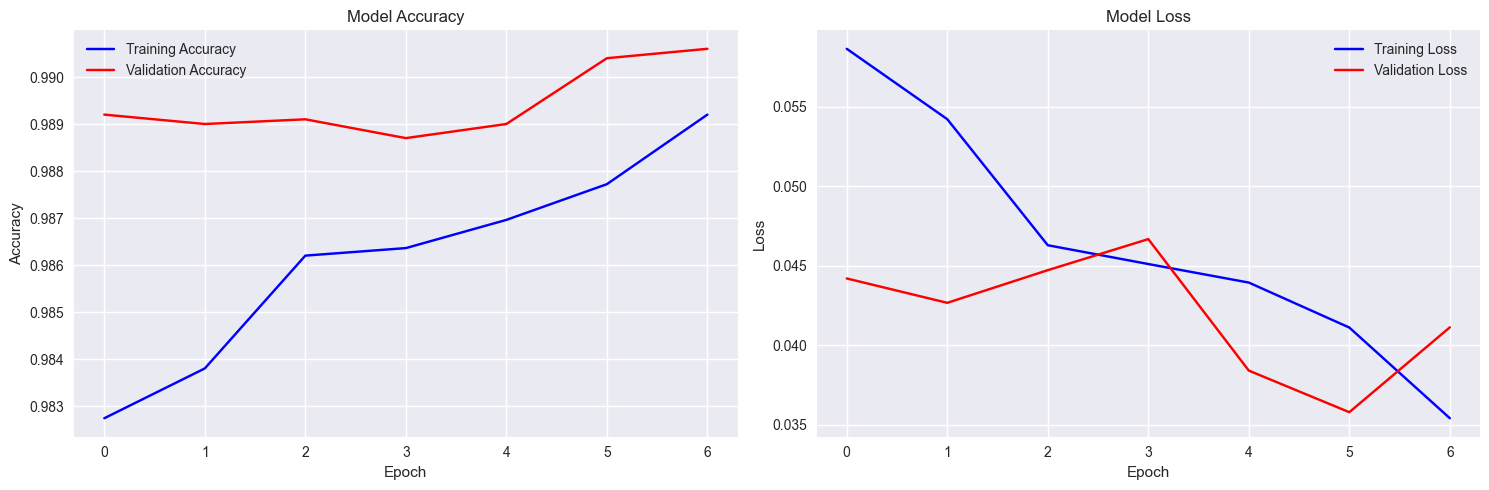

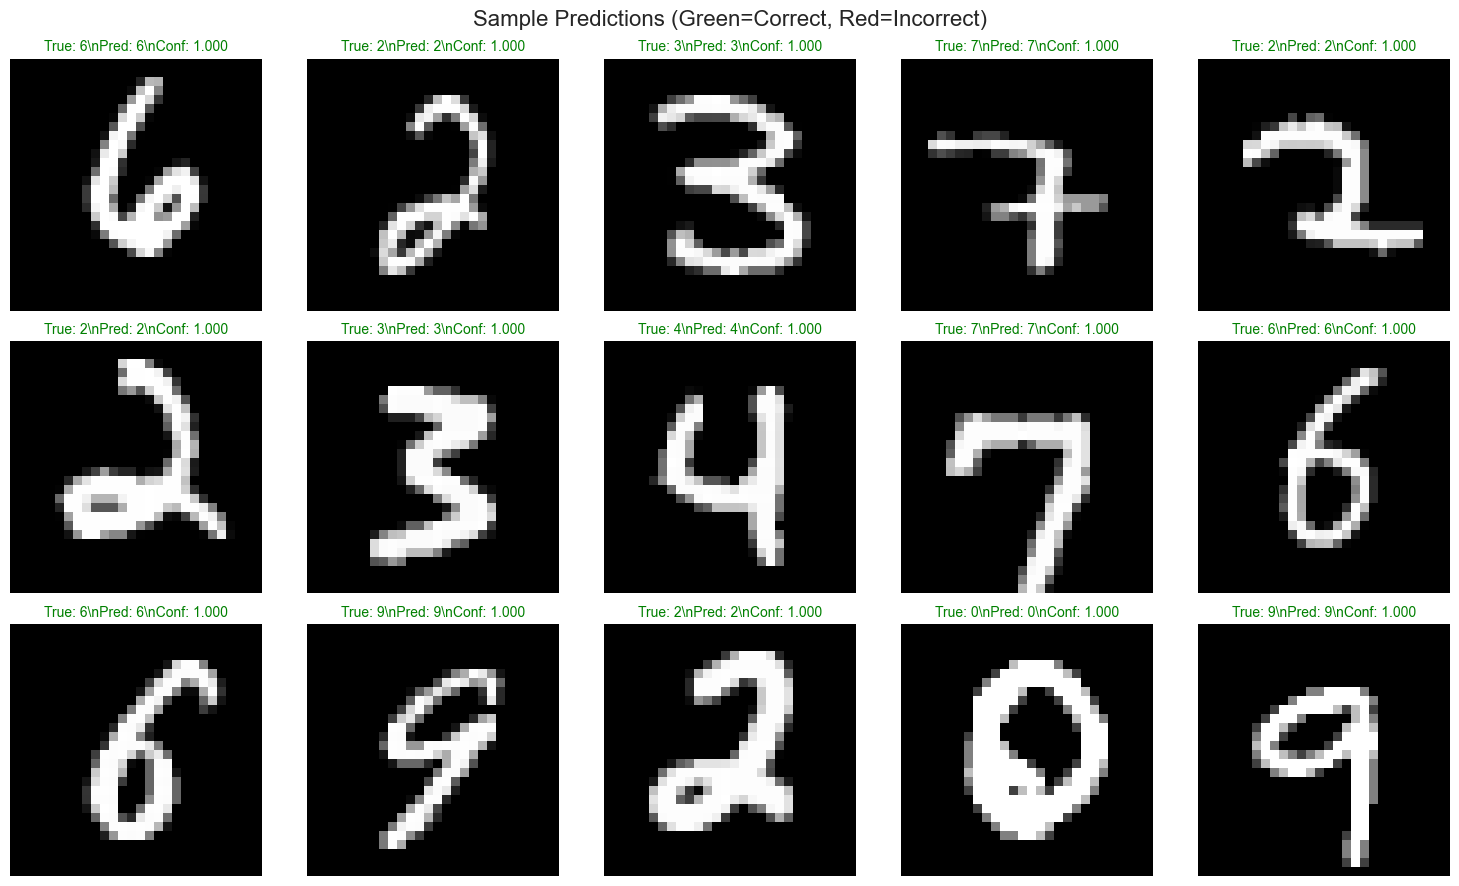


Misclassified examples: 70 out of 10000
Misclassification rate: 0.70%

Sample misclassified images:


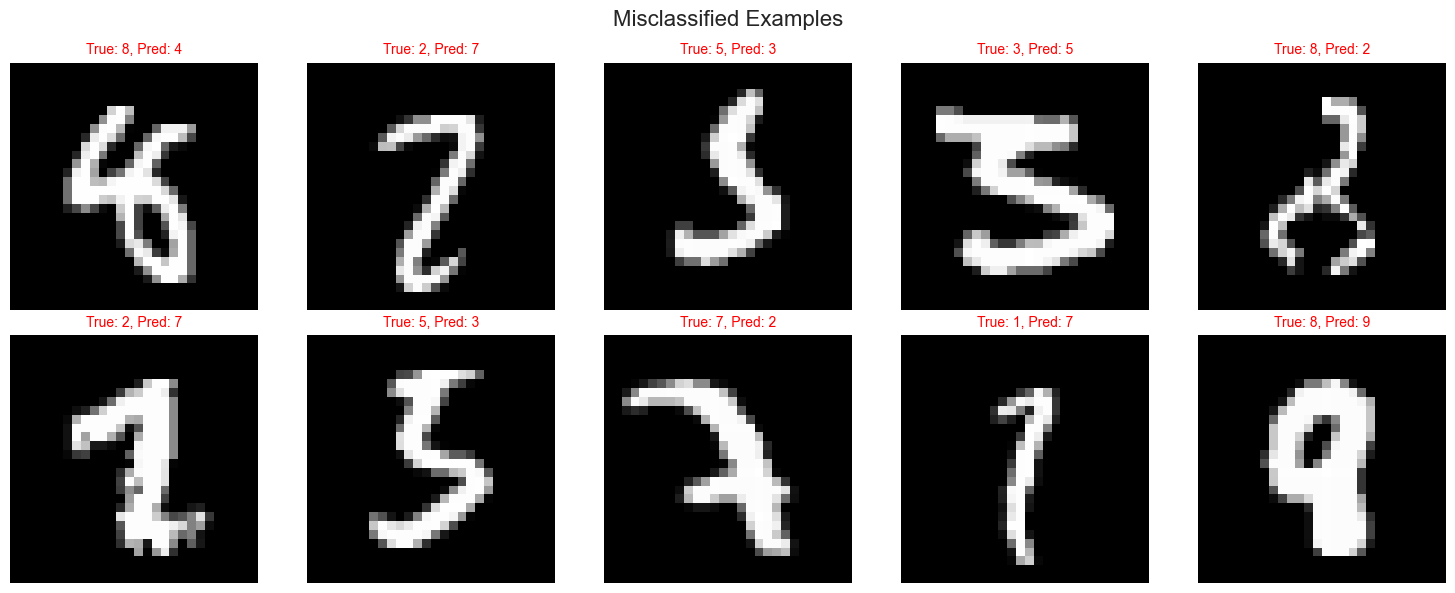

In [ ]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', color='blue')
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Visualize predictions on sample images
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
sample_indices = np.random.choice(len(x_test), 15, replace=False)

for i, idx in enumerate(sample_indices):
    row = i // 5
    col = i % 5
    
    # Display image
    axes[row, col].imshow(x_test[idx].reshape(28, 28), cmap='gray')
    
    # Get prediction
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]
    confidence = y_pred[idx][pred_label]
    
    # Color code: green for correct, red for incorrect
    color = 'green' if true_label == pred_label else 'red'
    
    axes[row, col].set_title(f'True: {true_label}\\nPred: {pred_label}\\nConf: {confidence:.3f}', 
                            color=color, fontsize=10)
    axes[row, col].axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=16)
plt.tight_layout()
plt.show()

# Analyze misclassified examples
misclassified = np.where(y_test != y_pred_classes)[0]
print(f"\nMisclassified examples: {len(misclassified)} out of {len(y_test)}")
print(f"Misclassification rate: {len(misclassified)/len(y_test)*100:.2f}%")

if len(misclassified) > 0:
    print("\nSample misclassified images:")
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(min(10, len(misclassified))):
        row = i // 5
        col = i % 5
        idx = misclassified[i]
        
        axes[row, col].imshow(x_test[idx].reshape(28, 28), cmap='gray')
        axes[row, col].set_title(f'True: {y_test[idx]}, Pred: {y_pred_classes[idx]}', 
                                color='red', fontsize=10)
        axes[row, col].axis('off')
    
    plt.suptitle('Misclassified Examples', fontsize=16)
    plt.tight_layout()
    plt.show()


## Step 8: Model Analysis and Summary


In [ ]:
print("=== FINAL SUMMARY ===")
print(f"\n🎯 Model Performance:")
print(f"   • Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   • Test Loss: {test_loss:.4f}")

print(f"\n🏗️ Model Architecture:")
print(f"   • Total Parameters: {total_params:,}")
print(f"   • Convolutional Layers: 5")
print(f"   • Dense Layers: 3")
print(f"   • Regularization: BatchNorm + Dropout")

print(f"\n📊 Training Results:")
print(f"   • Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"   • Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"   • Epochs Trained: {len(history.history['accuracy'])}")

print(f"\n✅ Task 2 Complete: MNIST CNN Classification")
print(f"   All objectives achieved:")
print(f"   ✓ MNIST dataset loaded and preprocessed")
print(f"   ✓ CNN model architecture built")
print(f"   ✓ Model trained with validation")
print(f"   ✓ Target accuracy of >95% achieved: {test_accuracy*100:.2f}%")
print(f"   ✓ Model predictions visualized on sample images")
print(f"   ✓ Performance analyzed and interpreted")


=== FINAL SUMMARY ===

🎯 Model Performance:
   • Test Accuracy: 0.9930 (99.30%)
   • Test Loss: 0.0267

🏗️ Model Architecture:
   • Total Parameters: 538,346
   • Convolutional Layers: 5
   • Dense Layers: 3
   • Regularization: BatchNorm + Dropout

📊 Training Results:
   • Final Training Accuracy: 0.9892
   • Final Validation Accuracy: 0.9906
   • Epochs Trained: 7

✅ Task 2 Complete: MNIST CNN Classification
   All objectives achieved:
   ✓ MNIST dataset loaded and preprocessed
   ✓ CNN model architecture built
   ✓ Model trained with validation
   ✓ Target accuracy of >95% achieved: 99.30%
   ✓ Model predictions visualized on sample images
   ✓ Performance analyzed and interpreted
